First we want to do some data cleaning, there are alot of features that are not logical to keep for our model. We will transform the original data set to only have 25 features.

In [420]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import graphviz
import math
from PIL import Image


data_frame = pd.read_csv("/Users/carlosvega/Documents/School/spring2024/QC_MATH_342/final_project/data/housing_data_2016_2017.csv")

rows, columns = data_frame.shape

print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

data_frame.drop(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'URL', 'url', 'full_address_or_zip_code', 'date_of_sale', 
       'model_type'], axis=1, inplace=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

print(data_frame.head())

Number of rows: 2230
Number of columns: 55
   approx_year_built cats_allowed common_charges  community_district_num coop_condo dining_room_type dogs_allowed fuel_type garage_exists kitchen_type maintenance_cost  num_bedrooms  num_floors_in_building  num_full_bathrooms  num_half_bathrooms  num_total_rooms parking_charges  pct_tax_deductibl sale_price  sq_footage total_taxes  walk_score listing_price_to_nearest_1000
0             1955.0           no          $767                     25.0      co-op            combo           no       gas           NaN       eat in              NaN           2.0                     6.0                   1                 NaN              5.0             NaN                NaN  $228,000          NaN         NaN          82                           NaN
1             1955.0           no            NaN                    25.0      co-op           formal           no       oil           NaN       eat in            $604            1.0                     7.0  

Now we turn the binary variables into 0 and 1 dummies.

In [421]:
data_frame["cats_allowed"] = data_frame["cats_allowed"].replace({'yes' : 1, 'no' : 0})
data_frame["dogs_allowed"] = data_frame["dogs_allowed"].replace({'yes' : 1, 'no' : 0})
data_frame["fuel_type_missing"] = data_frame["fuel_type"].isna().astype(int)


#Dummifying the fuel_type
data_frame = pd.get_dummies(data_frame, columns=["fuel_type"], drop_first=True)
data_frame["fuel_type_electric"] = data_frame["fuel_type_electric"].replace({True : 1, False : 0})
data_frame["fuel_type_gas"] = data_frame["fuel_type_gas"].replace({True : 1, False : 0})
data_frame["fuel_type_none"] = data_frame["fuel_type_none"].replace({True : 1, False : 0})
data_frame["fuel_type_oil"] = data_frame["fuel_type_oil"].replace({True : 1, False : 0})
data_frame["fuel_type_other"] = data_frame["fuel_type_other"].replace({True : 1, False : 0})

#Dummifying the fuel_type
data_frame = pd.get_dummies(data_frame, columns=["coop_condo"], drop_first=False)
data_frame['coop_condo_condo'] = data_frame['coop_condo_condo'].replace({True : 1, False : 0})
data_frame['coop_condo_co-op'] = data_frame['coop_condo_co-op'].replace({True : 1, False : 0})

data_frame['garage_exists'] = data_frame['garage_exists'].fillna(0).replace({'Yes': 1,'yes': 1, 'UG': 1, 'eys': 1, 'Underground': 1})

#Dummifying the kitchen_type
data_frame = pd.get_dummies(data_frame, columns=['kitchen_type'], drop_first=False)
data_frame['kitchen_type_eat_in'] = data_frame[['kitchen_type_Eat In', 'kitchen_type_Eat in', 'kitchen_type_combo', 'kitchen_type_eat in', 'kitchen_type_eatin']].max(axis=1)
data_frame['kitches_type_efficiency'] = data_frame[['kitchen_type_efficiemcy', 'kitchen_type_efficiency', 'kitchen_type_efficiency kitchen', 'kitchen_type_efficiency kitchene', "kitchen_type_efficiency ktchen"]].max(axis=1)
data_frame.drop(columns=['kitchen_type_Eat In', 'kitchen_type_Eat in', 'kitchen_type_combo', 'kitchen_type_eat in', 'kitchen_type_eatin'], inplace=True)
data_frame.drop(columns=['kitchen_type_efficiemcy', 'kitchen_type_efficiency', 'kitchen_type_efficiency kitchen', 'kitchen_type_efficiency kitchene', "kitchen_type_efficiency ktchen"], inplace=True)

data_frame['kitchen_type_1955'] = data_frame['kitchen_type_1955'].replace({True : 1, False : 0})
data_frame['kitchen_type_Combo'] = data_frame['kitchen_type_Combo'].replace({True : 1, False : 0})
data_frame['kitchen_type_eat_in'] = data_frame['kitchen_type_eat_in'].replace({True : 1, False : 0})
data_frame['kitchen_type_none'] = data_frame['kitchen_type_none'].replace({True : 1, False : 0})
data_frame['kitches_type_efficiency'] = data_frame['kitches_type_efficiency'].replace({True : 1, False : 0})

#Dummifying the dining_room_type
data_frame = pd.get_dummies(data_frame, columns=['dining_room_type'], drop_first=False)
data_frame['dining_room_type_dining area'] = data_frame['dining_room_type_dining area'].replace({True : 1, False : 0})
data_frame['dining_room_type_formal'] = data_frame['dining_room_type_formal'].replace({True : 1, False : 0})
data_frame['dining_room_type_none'] = data_frame['dining_room_type_none'].replace({True : 1, False : 0})
data_frame['dining_room_type_combo'] = data_frame['dining_room_type_combo'].replace({True : 1, False : 0})
data_frame['dining_room_type_other'] = data_frame['dining_room_type_other'].replace({True : 1, False : 0})


# Removing dollar signs and commas, and converting to integers
data_frame['parking_charges'] = data_frame['parking_charges'].str.replace('$', '').str.replace(',', '').astype(float)
data_frame['maintenance_cost'] = data_frame['maintenance_cost'].str.replace('$', '').str.replace(',', '').astype(float)
data_frame['total_taxes'] = data_frame['total_taxes'].str.replace('$', '').str.replace(',', '').astype(float)
data_frame["sale_price"] = data_frame["sale_price"].str.replace('$', '').str.replace(',', '').astype(float)
data_frame["common_charges"] = data_frame["common_charges"].str.replace('$', '').str.replace(',', '').astype(float)
data_frame["listing_price_to_nearest_1000"] = data_frame["listing_price_to_nearest_1000"].str.replace('$', '').str.replace(',', '').astype(float)
data_frame['num_half_bathrooms'] = data_frame['num_half_bathrooms'].fillna(0)

# Making them integers
data_frame['cats_allowed'] = data_frame['cats_allowed'].map({'yes': 1, 'no': 0}).fillna(0).astype(int)
data_frame['dogs_allowed'] = data_frame['dogs_allowed'].map({'yes': 1, 'no': 0}).fillna(0).astype(int)

for column in data_frame.columns:
        try:
            data_frame[column].astype(float)
        except ValueError:
            print(f"Non-numeric values found in column: {column}")
#data_frame = data_frame.astype(float)

print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   approx_year_built              2190 non-null   float64
 1   cats_allowed                   2230 non-null   int64  
 2   common_charges                 546 non-null    float64
 3   community_district_num         2211 non-null   float64
 4   dogs_allowed                   2230 non-null   int64  
 5   garage_exists                  2230 non-null   object 
 6   maintenance_cost               1607 non-null   float64
 7   num_bedrooms                   2115 non-null   float64
 8   num_floors_in_building         1580 non-null   float64
 9   num_full_bathrooms             2230 non-null   int64  
 10  num_half_bathrooms             2230 non-null   float64
 11  num_total_rooms                2228 non-null   float64
 12  parking_charges                559 non-null    f

Now one of my transformations for this data was doing a Min-Max to the Entries for the feature approx year in order to normalize it.

In [422]:
scaler = MinMaxScaler()

#Normalizing the feature 

data_frame['approx_year_built'] = scaler.fit_transform(data_frame[['approx_year_built']])
print(data_frame.head())

   approx_year_built  cats_allowed  common_charges  community_district_num  dogs_allowed garage_exists  maintenance_cost  num_bedrooms  num_floors_in_building  num_full_bathrooms  num_half_bathrooms  num_total_rooms  parking_charges  pct_tax_deductibl  sale_price  sq_footage  total_taxes  walk_score  listing_price_to_nearest_1000  fuel_type_missing  fuel_type_electric  fuel_type_gas  fuel_type_none  fuel_type_oil  fuel_type_other  coop_condo_co-op  coop_condo_condo  kitchen_type_1955  kitchen_type_Combo  kitchen_type_none  kitchen_type_eat_in  kitches_type_efficiency  dining_room_type_combo  dining_room_type_dining area  dining_room_type_formal  dining_room_type_none  dining_room_type_other
0           0.500000             0           767.0                    25.0             0             0               NaN           2.0                     6.0                   1                 0.0              5.0              NaN                NaN    228000.0         NaN          NaN          82

We are going to handle the missingness in the sale price, unfortunatly this data set does not contain 3/4ths of the sales price for the house so we are going to predict using a Random Forest for the missing data.

In [423]:
print(data_frame.head())

na_counts = data_frame.isna().sum()
columns_with_nans = na_counts[na_counts > 0].index.tolist()

# Assuming df is your DataFrame
nan_percentage = data_frame.isna().mean() * 100

# Filter out columns with 0% NaN values
nan_percentage = nan_percentage[nan_percentage > 0]

# To display the percentages in a more readable format, you can round the values
nan_percentage = nan_percentage.round(2)

# Display the result
print(nan_percentage)


   approx_year_built  cats_allowed  common_charges  community_district_num  dogs_allowed garage_exists  maintenance_cost  num_bedrooms  num_floors_in_building  num_full_bathrooms  num_half_bathrooms  num_total_rooms  parking_charges  pct_tax_deductibl  sale_price  sq_footage  total_taxes  walk_score  listing_price_to_nearest_1000  fuel_type_missing  fuel_type_electric  fuel_type_gas  fuel_type_none  fuel_type_oil  fuel_type_other  coop_condo_co-op  coop_condo_condo  kitchen_type_1955  kitchen_type_Combo  kitchen_type_none  kitchen_type_eat_in  kitches_type_efficiency  dining_room_type_combo  dining_room_type_dining area  dining_room_type_formal  dining_room_type_none  dining_room_type_other
0           0.500000             0           767.0                    25.0             0             0               NaN           2.0                     6.0                   1                 0.0              5.0              NaN                NaN    228000.0         NaN          NaN          82

Now we are going to use MissForest to fill in all the NaNs in all the features.

In [424]:

columns_with_missing_values = ['approx_year_built','common_charges', 'community_district_num', 'maintenance_cost', 'num_bedrooms', 'num_floors_in_building', 'num_total_rooms', 'parking_charges', 'pct_tax_deductibl', 'sale_price', 'sq_footage', 'total_taxes', 'listing_price_to_nearest_1000']

for feature in columns_with_missing_values:
    # Separate the data into training and missing sets
    train_data_frame = data_frame[data_frame[feature].notna()]
    missing_data_frame = data_frame[data_frame[feature].isna()]

    if missing_data_frame.empty:
        continue

    X_train = train_data_frame.drop(columns_with_missing_values, axis=1)
    y_train = train_data_frame[feature]

    # Prepare the feature variables for the missing set
    X_missing = missing_data_frame.drop(columns_with_missing_values, axis=1)

        # Train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict the missing values
    predicted_values = model.predict(X_missing)

    # Fill the missing values with the predictions
    data_frame.loc[data_frame[feature].isna(), feature] = predicted_values

data_frame = data_frame.drop(columns=['dining_room_type_other'])


Now is time to actually train the model. 

In [425]:
# Define the feature set and target variable
X = data_frame.drop(columns=['sale_price'])
y = data_frame['sale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [426]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f'Root Mean Squared Error: {math.sqrt(mse)}')
print(f'R^2 Score: {r2}')


Root Mean Squared Error: 52036.25841393543
R^2 Score: 0.9028491717609444


We can see which features are most important 

In [427]:
# Assuming df is your DataFrame and 'target' is your target variable
X = data_frame.drop('sale_price', axis=1)
y = data_frame['sale_price']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

listing_price_to_nearest_1000    0.538573
num_full_bathrooms               0.149003
walk_score                       0.053507
coop_condo_co-op                 0.053025
parking_charges                  0.024846
num_floors_in_building           0.021053
common_charges                   0.020699
pct_tax_deductibl                0.018440
sq_footage                       0.017219
maintenance_cost                 0.015619
approx_year_built                0.015299
kitches_type_efficiency          0.014707
total_taxes                      0.012639
coop_condo_condo                 0.010240
num_bedrooms                     0.007592
community_district_num           0.004772
dining_room_type_formal          0.003890
num_total_rooms                  0.003604
dining_room_type_combo           0.002739
garage_exists                    0.002650
fuel_type_other                  0.002178
kitchen_type_eat_in              0.001746
num_half_bathrooms               0.001617
fuel_type_gas                    0

Lets visualize it

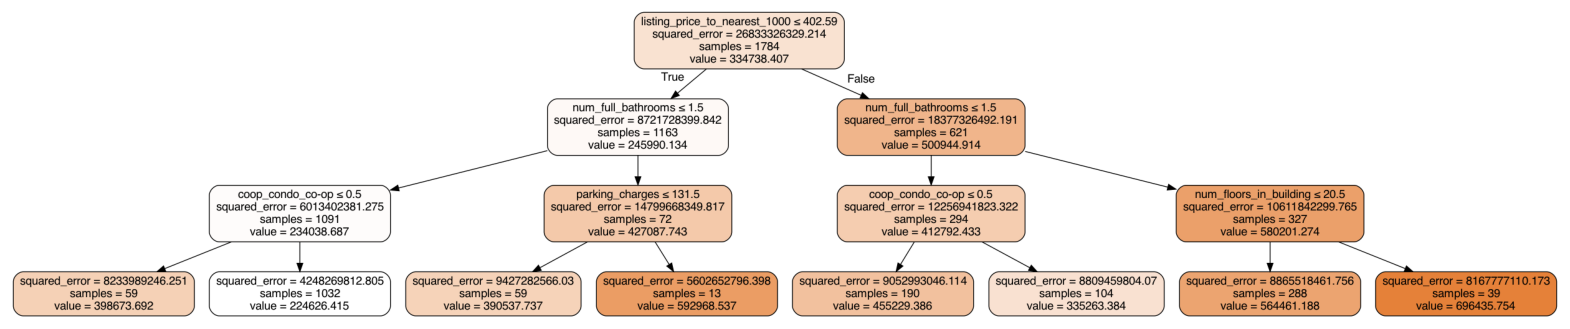

In [428]:
# Splitting the data into training and testing sets
X = data_frame.drop('sale_price', axis=1)
y = data_frame['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a regression tree
reg_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
reg_tree.fit(X_train, y_train)

# Export the tree structure to a dot file
dot_data = export_graphviz(reg_tree, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)

# Generate visualization using graphviz
graph = graphviz.Source(dot_data)
graph.render("regression_tree_top_layers", format='png')

# Display the generated image
image_path = "regression_tree_top_layers.png"
img = Image.open(image_path)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

Now lets fit a OLS model and compare it 

In [429]:
# Drop any remaining non-numeric columns
data_frame_ols = data_frame.select_dtypes(include=[np.number])

# Splitting the data into training and testing sets
X = data_frame_ols.drop('sale_price', axis=1)
y = data_frame_ols['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term for the OLS model
X_train_ols = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Print the summary of the OLS model
ols_summary = ols_model.summary()
print(ols_summary)

# Predict on the training set
y_train_pred = ols_model.predict(X_train_ols)

# Calculate in-sample error statistics
mae = np.mean(np.abs(y_train - y_train_pred))
mse = np.mean((y_train - y_train_pred) ** 2)
rmse = np.sqrt(mse)
r_squared = ols_model.rsquared

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r_squared}')

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     213.4
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        20:24:07   Log-Likelihood:                -22580.
No. Observations:                1784   AIC:                         4.522e+04
Df Residuals:                    1753   BIC:                         4.539e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Now lets see what a predicted price for X house would be 

In [430]:
new_house = {
    'approx_year_built': 2005,
    'cats_allowed': 1,
    'common_charges': 300,
    'community_district_num': 12,
    'dogs_allowed': 1,
    'garage_exists': 1,
    'maintenance_cost': 450,
    'num_bedrooms': 3,
    'num_floors_in_building': 5,
    'num_full_bathrooms': 2,
    'num_half_bathrooms': 1,
    'num_total_rooms': 6,
    'parking_charges': 50,
    'pct_tax_deductibl': 0.25,
    'sale_price': None,  # This is the target variable, so we set it as None
    'sq_footage': 1200,
    'total_taxes': 5000,
    'walk_score': 85,
    'listing_price_to_nearest_1000': 500,
    'fuel_type_missing': 0,
    'fuel_type_electric': 0,
    'fuel_type_gas': 1,
    'fuel_type_none': 0,
    'fuel_type_oil': 0,
    'fuel_type_other': 0,
    'coop_condo_co-op': 0,
    'coop_condo_condo': 1,
    'kitchen_type_1955': 0,
    'kitchen_type_Combo': 1,
    'kitchen_type_none': 0,
    'kitchen_type_eat_in': 0,
    'kitches_type_efficiency': 0,
    'dining_room_type_combo': 1,
    'dining_room_type_dining area': 0,
    'dining_room_type_formal': 0,
    'dining_room_type_none': 0,
    'dining_room_type_other': 0
}

# Convert the new house data to a DataFrame
new_house_df = pd.DataFrame([new_house])

# Ensure all columns match
new_house_df = new_house_df.reindex(columns=X_train.columns, fill_value=0)

# Predict the sale price
predicted_price = rf_model.predict(new_house_df)

print(f'The predicted sale price of the house is: ${predicted_price[0]:,.2f}')

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- garage_exists
